##Preparation for HW

In [1]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from sklearn.model_selection import train_test_split
from collections import Counter

import nltk
from nltk.corpus import stopwords

from nltk.tokenize import TweetTokenizer
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from sklearn. preprocessing import OneHotEncoder
from scipy.sparse import hstack

In [2]:
!wget https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2024/homeworks/hw06_texts/tweets_coronavirus.csv

--2024-05-13 18:26:27--  https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2024/homeworks/hw06_texts/tweets_coronavirus.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8829280 (8.4M) [text/plain]
Saving to: ‘tweets_coronavirus.csv.4’

tweets_coronavirus. 100%[===================>]   8.42M  --.-KB/s    in 0.09s   

2024-05-13 18:26:27 (96.0 MB/s) - ‘tweets_coronavirus.csv.4’ saved [8829280/8829280]



In [3]:
df = pd.read_csv('/content/tweets_coronavirus.csv', encoding='latin-1')
df.sample(4)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
18043,25755,70707,"Houston, TX",25-03-2020,I used to hide my electronics or other valuabl...,Positive
4989,9863,54815,kolkata,19-03-2020,Panic buying is putting additional pressure on...,Extremely Negative
19934,28100,73052,India,26-03-2020,"Next 21 days are crucial to you, me &amp; our ...",Extremely Negative
27239,37213,82165,the place,08-04-2020,This adjustment to Canada summer jobs is usele...,Negative


#Ex.1 Preparation

In [4]:
df["Sentiment"].value_counts()

Sentiment
Positive              11422
Negative               9917
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

In [5]:
df["Sentiment"] = df["Sentiment"].apply(lambda x: 1 if (x == "Positive" or x == "Extremely Positive")
                                        else 0 if (x == "Negative" or x == "Extremely Negative")
                                                else np.NaN)

In [6]:
balance = df["Sentiment"].value_counts()
print(balance, "\n\nРазница: ", (balance[1] - balance[0]) / balance[1])
print("\nКак видим, количество позитивных и негативных отличается примерно на 14%, данные сбалансированы")

print("\nКоличество пропусков: ", df.isna().sum().sum(),
      " Количество пропусков в таргете: ", df["Sentiment"].isna().sum().sum())

df.fillna("Unknown", inplace=True)

print("\nКоличество пропусков: ", df.isna().sum().sum())

Sentiment
1    18046
0    15398
Name: count, dtype: int64 

Разница:  0.14673611880749196

Как видим, количество позитивных и негативных отличается примерно на 14%, данные сбалансированы

Количество пропусков:  7049  Количество пропусков в таргете:  0

Количество пропусков:  0


In [7]:
X_train, X_test = train_test_split(df, train_size=0.7, random_state=0)

#Ex.2 Tokenization

In [8]:
tokens = Counter()

vsp = X_train["OriginalTweet"].apply(lambda x: tokens.update(Counter(x.lower().split())))

In [9]:
print("    Размер словаря: ", len(tokens))
print("\n    Топ 10 популярных слов\n==============================",)
top10 = dict(sorted(tokens.items(), key=lambda item: item[1], reverse=True)[:10])
for key in top10:
  print("   ", key, " " * (13 - len(key)), top10[key])

#Слова в топе тк это предлоги или артикли, их больше в речи

    Размер словаря:  79755

    Топ 10 популярных слов
    the            26815
    to             23373
    and            14684
    of             13012
    a              11737
    in             11198
    for            8566
    #coronavirus   8223
    is             7383
    are            7050


In [10]:
nltk.download('stopwords')

for i in stopwords.words('english'):
  if i in tokens:
    tokens.pop(i)

top10_without_stops = dict(sorted(tokens.items(), key=lambda item: item[1], reverse=True)[:10])

print("\n     Размер словаря: ", len(tokens))
print("\nТоп 10 популярных слов без стоп слов:\n=====================================")

for key in top10_without_stops:
  print("      ", key, " " * (13 - len(key)), top10_without_stops[key])
print("\n\n")

#Слова в топе касаются коронавируса и проблем, связанных с ним: люди, еда, супермаркеты итд


     Размер словаря:  79584

Топ 10 популярных слов без стоп слов:
       #coronavirus   8223
       prices         3891
       food           3820
       grocery        3469
       supermarket    3288
       people         3175
       covid-19       3173
       store          3155
       #covid19       2471
       &amp;          2314





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
untop20 = dict(sorted(tokens.items(), key=lambda item: item[1])[:20])

print("\n       Размер словаря: ", len(tokens))
print("\nТоп 20 непопулярных слов без стоп слов:\n=======================================")

for key in untop20:
  print("   ", key, " " * (24 - len(key)), untop20[key])

#Много бессмысленных ссылок, которые нужно убирать


       Размер словаря:  79584

Топ 20 непопулярных слов без стоп слов:
    https://t.co/1m881cwfuv   1
    happy..                   1
    https://t.co/z0intks34x   1
    mnuchinãâs              1
    brink.                    1
    https://t.co/jmobv8z0u0   1
    university's              1
    teaching.)                1
    @catholicpres             1
    @catholicuniv             1
    https://t.co/evqby035wf   1
    https://t.co/riqrhxxeim   1
    @@ballardspahrll          1
    #aca                      1
    easier...take             1
    ãânecessaryãâ         1
    https://t.co/0fmsmlgepm   1
    husted:                   1
    irishman                  1
    #happystpatricksday!      1


In [12]:
tokenizer = TweetTokenizer()

tokens = Counter({})

vsp = X_train["OriginalTweet"].apply(lambda x: tokens.update(Counter(tokenizer.tokenize(x.lower()))))

In [13]:
top10_TT = dict(sorted(tokens.items(), key=lambda item: item[1], reverse=True)[:10])

print("\n        Размер словаря: ", len(tokens))
print("\nТоп 10 популярных слов c Токенайзером:\n======================================")

for key in top10_TT:
  print("        ", key, " " * (13 - len(key)), top10_TT[key])

#Топ отличается, потому что токенайзер отделяет знаки препинания, они очевидно есть в топе


        Размер словаря:  58348

Топ 10 популярных слов c Токенайзером:
         the            26993
         .              24118
         to             23478
         ,              17571
         and            14825
         of             13044
         a              11891
         in             11348
         ?              9524
         #coronavirus   8808


In [14]:
for i in stopwords.words('english'):
  if i in tokens:
    tokens.pop(i)

for i in punctuation:
  if i in tokens:
    tokens.pop(i)

top10_TT_without_stops = dict(sorted(tokens.items(), key=lambda item: item[1], reverse=True)[:10])

print("\n              Размер словаря: ", len(tokens))
print("\nТоп 10 популярных слов c Токенайзером и без стоп слов:\n======================================================")

for key in top10_TT_without_stops:
  print("               ", key, " " * (13 - len(key)), top10_TT_without_stops[key])

#Топ стал похожим на адекватный, но остались слова-символы, которые бы надо удалить


              Размер словаря:  58145

Топ 10 популярных слов c Токенайзером и без стоп слов:
                #coronavirus   8808
                â              7415
                              7311
                19             7167
                covid          6253
                prices         4601
                              4372
                food           4367
                store          3877
                supermarket    3805


In [15]:
t = tokens.copy()

for i in t:
  if len(i) == 1 and ord(i) >= 128:
    tokens.pop(i)

top10_TT_without_stops2 = dict(sorted(tokens.items(), key=lambda item: item[1], reverse=True)[:10])
untop20_TT = dict(sorted(tokens.items(), key=lambda item: item[1])[:20])

print("\n              Размер словаря: ", len(tokens))
print("\nТоп 10 популярных слов c Токенайзером и без стоп слов:\n======================================================")

for key in top10_TT_without_stops2:
  print("               ", key, " " * (13 - len(key)), top10_TT_without_stops2[key])

print("\n\nТоп 20 непопулярных слов c Токенайзером и без стоп слов:\n=======================================================")

for key in untop20_TT:
  print("           ", key, " " * (24 - len(key)), untop20_TT[key])

#Новые топы стали лучше. Токенизируя по пробелам, многие популярные слова разделяются,
#потому что после них могли быть знаки препинания


              Размер словаря:  58105

Топ 10 популярных слов c Токенайзером и без стоп слов:
                #coronavirus   8808
                19             7167
                covid          6253
                prices         4601
                food           4367
                store          3877
                supermarket    3805
                grocery        3523
                people         3463
                #covid19       2589


Топ 20 непопулярных слов c Токенайзером и без стоп слов:
            https://t.co/1m881cwfuv   1
            https://t.co/z0intks34x   1
            mnuchinã                  1
            https://t.co/jmobv8z0u0   1
            university's              1
            @catholicpres             1
            @catholicuniv             1
            https://t.co/evqby035wf   1
            https://t.co/riqrhxxeim   1
            @ballardspahrll           1
            #aca                      1
            https://t.co/0fmsmlgepm   1
       

In [16]:
top10_hashtag = dict(sorted(tokens.items(), key=lambda item: item[1] if item[0][0] == "#" else 0, reverse=True)[:10])

print("   Топ 10 популярных хэштегов\n===============================")
for key in top10_hashtag:
  print("  ", key, " " * (20 - len(key)), top10_hashtag[key])

#Очевидно, что хэштеги касаются коронавируса и проблем, связанных с ним

   Топ 10 популярных хэштегов
   #coronavirus          8808
   #covid19              2589
   #covid_19             1734
   #covid2019            946
   #toiletpaper          744
   #covid                641
   #socialdistancing     465
   #coronacrisis         448
   #pandemic             257
   #coronaviruspandemic  249


In [17]:
top10_hashtag = dict(sorted(tokens.items(), key=lambda item: item[1] if item[0][:13] == "https://t.co/" else 0, reverse=True)[:10])

print("       Топ 10 популярных ссылок\n====================================")
for key in top10_hashtag:
  print("  ", key, " " * (27 - len(key)), top10_hashtag[key])

#Ссылки надо удалять

       Топ 10 популярных ссылок
   https://t.co/oxa7swtond      5
   https://t.co/gp3eusapl8      4
   https://t.co/deftrui1pfãâ   3
   https://t.co/wrlhyzizaa      3
   https://t.co/kuwipf1kqw      3
   https://t.co/zjnrx6dkkn      3
   https://t.co/3gbbdpdjat      3
   https://t.co/e2znxajpre      3
   https://t.co/catkegayoy      3
   https://t.co/g63rp042ho      3


In [18]:
def custom_tokenizer(text):

  ##to_lower()
  text = text.lower()

  #tokenization
  tk = TweetTokenizer()
  tokens = tk.tokenize(text)

  #changing
  tokens = [i for i in tokens if not(len(i) == 1 and ord(i) >= 128 or
                                     i in punctuation or
                                     i[:13] == "https://t.co/" or
                                     i in stopwords.words('english'))]
  return tokens

In [19]:
custom_tokenizer('This is sample text!!!! @Sample_text I, \x92\x92 https://t.co/sample  #sampletext')

['sample', 'text', '@sample_text', '#sampletext']

#Ex. 3 Vectorization of texts

In [20]:
cv = CountVectorizer(tokenizer=custom_tokenizer)

cv.fit(X_train["OriginalTweet"])

print(len(cv.vocabulary_))
#Словарь намного меньше

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


45308


In [21]:
ind = 9023
print(X_train.iloc[ind]['OriginalTweet']," - ", "Negative" if not X_train["Sentiment"].iloc[ind] else "Positive", "\n\n")

res = cv.transform([X_train.iloc[ind]['OriginalTweet']])

indexes = np.where(res.toarray()[0] > 0)
sent = np.array(cv.get_feature_names_out())[indexes]

print("       Токены 9023 твита\n===============================")
for i in range(len(sent)):
  print("   ", sent[i], " " * (20 - len(sent[i])), res.toarray()[0][indexes[0][i]])

#Важность токенов одинаковая, они все встречаются по одному разу в твите

Nice one @SkyNews lets not panic but show ppl in france queueing for food!!! #CoronavirusOutbreak #COVID2019 brainless!! Ffs  -  Negative 


       Токены 9023 твита
    #coronavirusoutbreak  1
    #covid2019            1
    @skynews              1
    brainless             1
    ffs                   1
    food                  1
    france                1
    lets                  1
    nice                  1
    one                   1
    panic                 1
    ppl                   1
    queueing              1
    show                  1


In [22]:
tfid = TfidfVectorizer(tokenizer=custom_tokenizer)
tfid.fit(X_train["OriginalTweet"])

TfidfVectorizer(tokenizer=<function custom_tokenizer at 0x7bf6ccb464d0>)

In [23]:
res = tfid.transform([X_train.iloc[ind]['OriginalTweet']])

indexes = np.where(res.toarray()[0] != 0)
sent = (np.array(tfid.get_feature_names_out()))[indexes]

print("               Токены 9023 твита\n==================================================")
for i in range(len(sent)):
  print("   ", sent[i], " " * (20 - len(sent[i])), round(res.toarray()[0][indexes[0][i]], 3))

#Самый важный токен - brainless. Определилось хорошо. Самый бесполезный - food. Относительно
#неверно, потому что во время пандемии про еду говорили именно обсуждая проблемы

               Токены 9023 твита
    #coronavirusoutbreak  0.226
    #covid2019            0.168
    @skynews              0.31
    brainless             0.387
    ffs                   0.324
    food                  0.113
    france                0.32
    lets                  0.301
    nice                  0.254
    one                   0.163
    panic                 0.148
    ppl                   0.255
    queueing              0.354
    show                  0.244


In [24]:
good_words = ["amazing", "awesome", "fantastic"]

max_text = ""
max_index = 0
max_value = -1

for i in good_words:
  arr_with_good_word = X_train[X_train["OriginalTweet"].str.contains(i) & X_train["Sentiment"] == 1]["OriginalTweet"]
  res = tfid.transform(arr_with_good_word)
  for j in range(min(2, len(arr_with_good_word))):
    indexes = np.where(res.toarray()[j] != 0)
    sent = (np.array(tfid.get_feature_names_out()))[indexes]
    print("\n==================================================\nТекст: ", arr_with_good_word.iloc[j],
          "\nСамый важный токен: ", np.array(tfid.get_feature_names_out())[res[j].argmax()])
    for k in range(len(sent)):
      print("   ", sent[k], " " * (20 - len(sent[k])), round(res.toarray()[j][indexes[0][k]], 3))

#Относительно неплохо определилось для слова 'fantastic'. Хэштег familymeals звучит положительно


Текст:  Hearing so many stories of NHS heroes Teachers have been equally amazing Having briefly walked into a supermarket today and walked out again there are some absolute superstar supermarket workers out there too 
Самый важный токен:  walked
    absolute              0.244
    amazing               0.215
    briefly               0.312
    equally               0.298
    hearing               0.244
    heroes                0.201
    many                  0.147
    nhs                   0.197
    stories               0.245
    supermarket           0.191
    superstar             0.318
    teachers              0.23
    today                 0.148
    walked                0.507
    workers               0.13

Текст:  Let s just take a minute to say THANK YOU also to the amazing postal workers So many real people behind a click of online shopping and getting cards delivered Thank   you   19 
Самый важный токен:  thank
    19                    0.086
    also                  0.17

#Ex. 4 Training of the first models

In [25]:
cv_res_train = cv.transform(X_train["OriginalTweet"])
tfid_res_train = tfid.transform(X_train["OriginalTweet"])

cv_res_test = cv.transform(X_test["OriginalTweet"])
tfid_res_test = tfid.transform(X_test["OriginalTweet"])

In [26]:
log_reg = LogisticRegression(max_iter=250)
log_reg.fit(cv_res_train, X_train["Sentiment"])

print("Accuraccy на CountVectorizer (train): ", round(accuracy_score(X_train["Sentiment"], log_reg.predict(cv_res_train)),3))
print("Accuraccy на CountVectorizer (test): ", round(accuracy_score(X_test["Sentiment"], log_reg.predict(cv_res_test)), 3))

log_reg.fit(tfid_res_train, X_train["Sentiment"])

print("Accuraccy на TFIDVectorizer (train): ", round(accuracy_score(X_train["Sentiment"], log_reg.predict(tfid_res_train)), 3))
print("Accuraccy на TFIDVectorizer (test): ", round(accuracy_score(X_test["Sentiment"], log_reg.predict(tfid_res_test)), 3))

#Лучший векторайзер - обычный. Но результаты у обоих неплохие

Accuraccy на CountVectorizer (train):  0.984
Accuraccy на CountVectorizer (test):  0.867
Accuraccy на TFIDVectorizer (train):  0.925
Accuraccy на TFIDVectorizer (test):  0.853


#Ex. 5 Stamming

In [27]:
def custom_stem_tokenizer(text):
  ##to_lower()
  text = text.lower()

  stemmer = SnowballStemmer(language="english")

  #tokenization
  tk = TweetTokenizer()
  tokens = tk.tokenize(text)

  #changing
  tokens = [stemmer.stem(i) for i in tokens if not(len(i) == 1 and ord(i) >= 128 or
                                     i in punctuation or
                                     i[:13] == "https://t.co/" or
                                     i in stopwords.words('english'))]

  return tokens

In [28]:
custom_stem_tokenizer('This is sample text!!!! @Sample_text I, \x92\x92 https://t.co/sample  #sampletext adding more words to check stemming')

['sampl', 'text', '@sample_text', '#sampletext', 'ad', 'word', 'check', 'stem']

In [29]:
cv_stem = CountVectorizer(tokenizer=custom_stem_tokenizer)
tfid_stem = TfidfVectorizer(tokenizer=custom_stem_tokenizer)

cv_stem.fit(X_train["OriginalTweet"])
tfid_stem.fit(X_train["OriginalTweet"])

print(len(cv_stem.vocabulary_))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


36652


In [30]:
cv_res_stem_train = cv_stem.transform(X_train["OriginalTweet"])
tfid_res_stem_train = tfid_stem.transform(X_train["OriginalTweet"])

cv_res_stem_test = cv_stem.transform(X_test["OriginalTweet"])
tfid_res_stem_test = tfid_stem.transform(X_test["OriginalTweet"])

In [31]:
stem_log_reg = LogisticRegression(max_iter=250)

stem_log_reg.fit(cv_res_stem_train, X_train["Sentiment"])

print("Accuraccy на CountVectorizer (train): ", round(accuracy_score(X_train["Sentiment"], stem_log_reg.predict(cv_res_stem_train)),3))
print("Accuraccy на CountVectorizer (test): ", round(accuracy_score(X_test["Sentiment"], stem_log_reg.predict(cv_res_stem_test)), 3))

stem_log_reg.fit(tfid_res_stem_train, X_train["Sentiment"])

print("Accuraccy на TFIDVectorizer (train): ", round(accuracy_score(X_train["Sentiment"], stem_log_reg.predict(tfid_res_stem_train)), 3))
print("Accuraccy на TFIDVectorizer (test): ", round(accuracy_score(X_test["Sentiment"], stem_log_reg.predict(tfid_res_stem_test)), 3))

#Почти ничего не поменялось, есть небольшой прирост, в целом применять стемминг можно

Accuraccy на CountVectorizer (train):  0.972
Accuraccy на CountVectorizer (test):  0.867
Accuraccy на TFIDVectorizer (train):  0.916
Accuraccy на TFIDVectorizer (test):  0.856


#Ex. 6 Working with frequencies

In [32]:
cv_df = CountVectorizer(tokenizer=custom_stem_tokenizer, max_df=7000).fit(X_train["OriginalTweet"])

print(len(cv_df.vocabulary_))

#Значение достаточно большое потому что слов с большой частотой мало

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


36651


In [33]:
cv_df = CountVectorizer(tokenizer=custom_stem_tokenizer, min_df=11).fit(X_train["OriginalTweet"])

print(len(cv_df.vocabulary_))

#Очевидно, что многие слова встречаются очень редко. Поэтому min_df=11 сильно урезает словарь

3700


In [34]:
log_reg = LogisticRegression(max_iter=250)

res_train = cv_df.transform(X_train["OriginalTweet"])
res_test = cv_df.transform(X_test["OriginalTweet"])

log_reg.fit(res_train, X_train["Sentiment"])

print("Accuraccy на CountVectorizer (train): ", round(accuracy_score(X_train["Sentiment"], log_reg.predict(res_train)),3))
print("Accuraccy на CountVectorizer (test): ", round(accuracy_score(X_test["Sentiment"], log_reg.predict(res_test)), 3))

Accuraccy на CountVectorizer (train):  0.929
Accuraccy на CountVectorizer (test):  0.868


In [35]:
scaler = StandardScaler(with_mean=False)

res_train = scaler.fit_transform(res_train)
res_test = scaler.fit_transform(res_test)

log_reg.fit(res_train, X_train["Sentiment"])

print("Accuraccy на CountVectorizer (train): ", round(accuracy_score(X_train["Sentiment"], log_reg.predict(res_train)),3))
print("Accuraccy на CountVectorizer (test): ", round(accuracy_score(X_test["Sentiment"], log_reg.predict(res_test)), 3))

Accuraccy на CountVectorizer (train):  0.942
Accuraccy на CountVectorizer (test):  0.847


In [36]:
pos10 = np.argpartition(log_reg.coef_[0], -10)[-10:]
neg10 = np.argpartition(log_reg.coef_[0], 10)[:10]

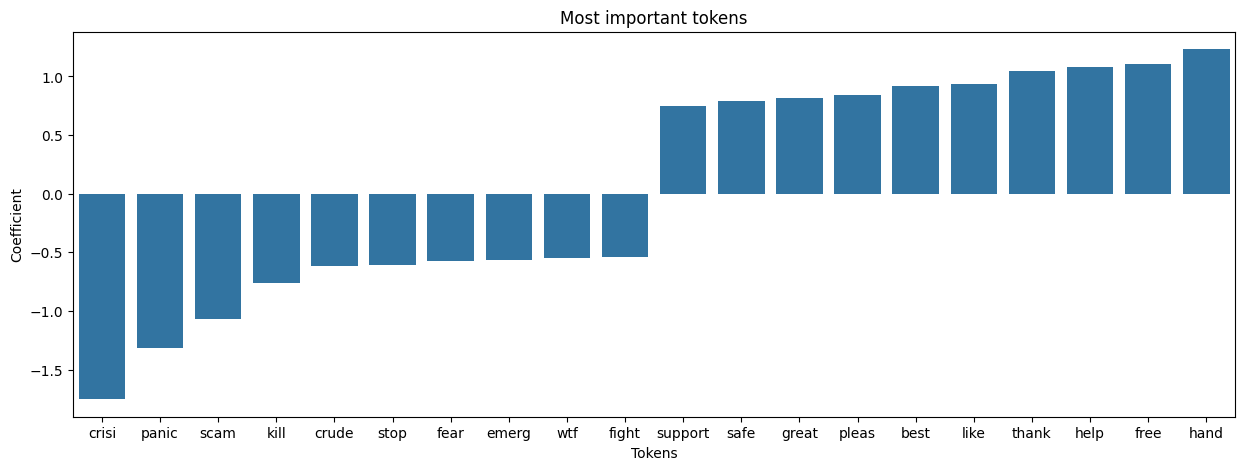

In [37]:
plt.figure(figsize=(15, 5))
plt.title("Most important tokens")

lt = sorted(np.hstack([neg10, pos10]), key=lambda x: log_reg.coef_.reshape(-1)[x])

sns.barplot(x=cv_df.get_feature_names_out()[lt], y=log_reg.coef_.reshape(-1)[lt])
plt.xlabel("Tokens")
plt.ylabel("Coefficient")

plt.show()

#нууууу, определилось неплохо

#Ex. 7 Other fetures

In [38]:
df["TweetAt"] = df["TweetAt"].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [39]:
sorted(df["TweetAt"].unique())

[Timestamp('2020-03-16 00:00:00'),
 Timestamp('2020-03-17 00:00:00'),
 Timestamp('2020-03-18 00:00:00'),
 Timestamp('2020-03-19 00:00:00'),
 Timestamp('2020-03-20 00:00:00'),
 Timestamp('2020-03-21 00:00:00'),
 Timestamp('2020-03-22 00:00:00'),
 Timestamp('2020-03-23 00:00:00'),
 Timestamp('2020-03-24 00:00:00'),
 Timestamp('2020-03-25 00:00:00'),
 Timestamp('2020-03-26 00:00:00'),
 Timestamp('2020-03-27 00:00:00'),
 Timestamp('2020-03-28 00:00:00'),
 Timestamp('2020-03-29 00:00:00'),
 Timestamp('2020-03-30 00:00:00'),
 Timestamp('2020-03-31 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-04-02 00:00:00'),
 Timestamp('2020-04-03 00:00:00'),
 Timestamp('2020-04-04 00:00:00'),
 Timestamp('2020-04-05 00:00:00'),
 Timestamp('2020-04-06 00:00:00'),
 Timestamp('2020-04-07 00:00:00'),
 Timestamp('2020-04-08 00:00:00'),
 Timestamp('2020-04-09 00:00:00'),
 Timestamp('2020-04-10 00:00:00'),
 Timestamp('2020-04-11 00:00:00'),
 Timestamp('2020-04-12 00:00:00'),
 Timestamp('2020-04-

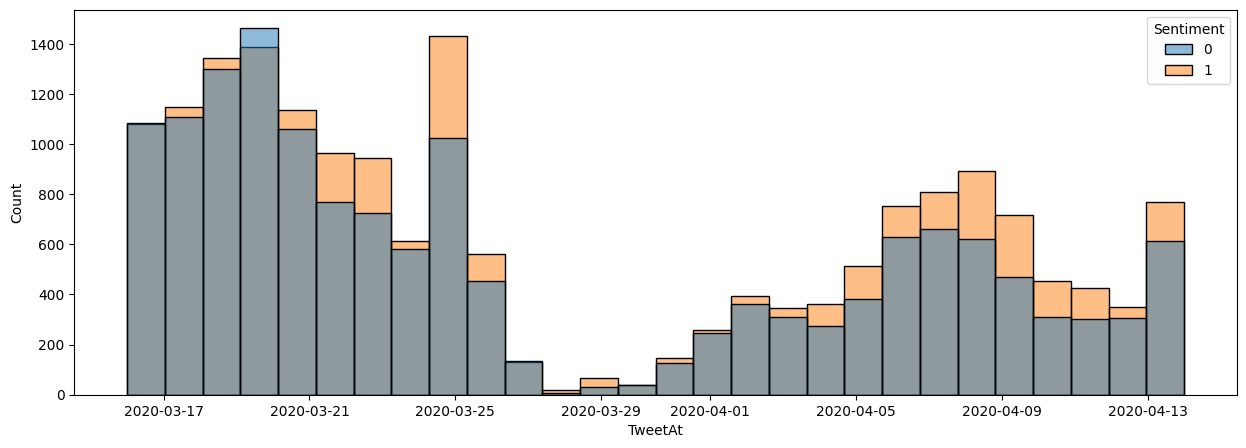

In [40]:
plt.figure(figsize=(15, 5))
sns.histplot(data=df, x='TweetAt', hue="Sentiment", stat="count")

plt.show()

#первые два столбца очевидно бесполезны, время как оказалось тоже, каждый день примерно одиновоко много плохих и хороших твитов

In [41]:
len(df["Location"].unique())

10465

In [42]:
df["Location"].value_counts()[1:11].index

Index(['London', 'United States', 'London, England', 'Washington, DC',
       'New York, NY', 'United Kingdom', 'Los Angeles, CA', 'India', 'UK',
       'USA'],
      dtype='object', name='Location')

<Axes: xlabel='Location', ylabel='Count'>

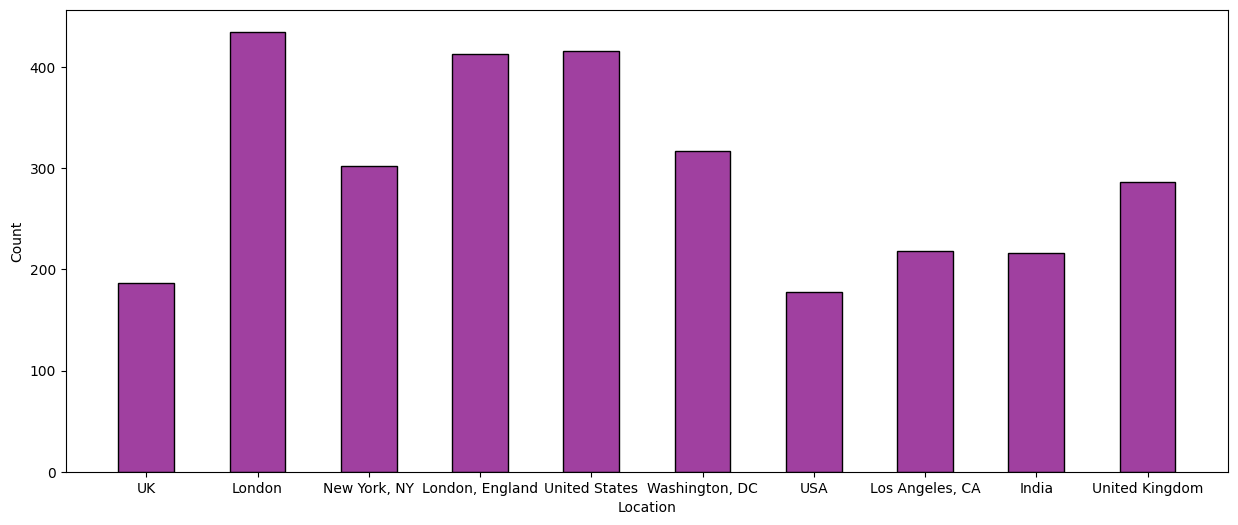

In [43]:
plt.figure(figsize=(15, 6))

sns.histplot(data=pd.DataFrame(df[df["Location"].isin(df["Location"].value_counts()[1:11].index)]),
             x="Location", color="purple", shrink=.5)

In [44]:
df["WiderLocation"] = df["Location"].apply(lambda x: x.split(",")[-1])

<Axes: xlabel='WiderLocation', ylabel='Count'>

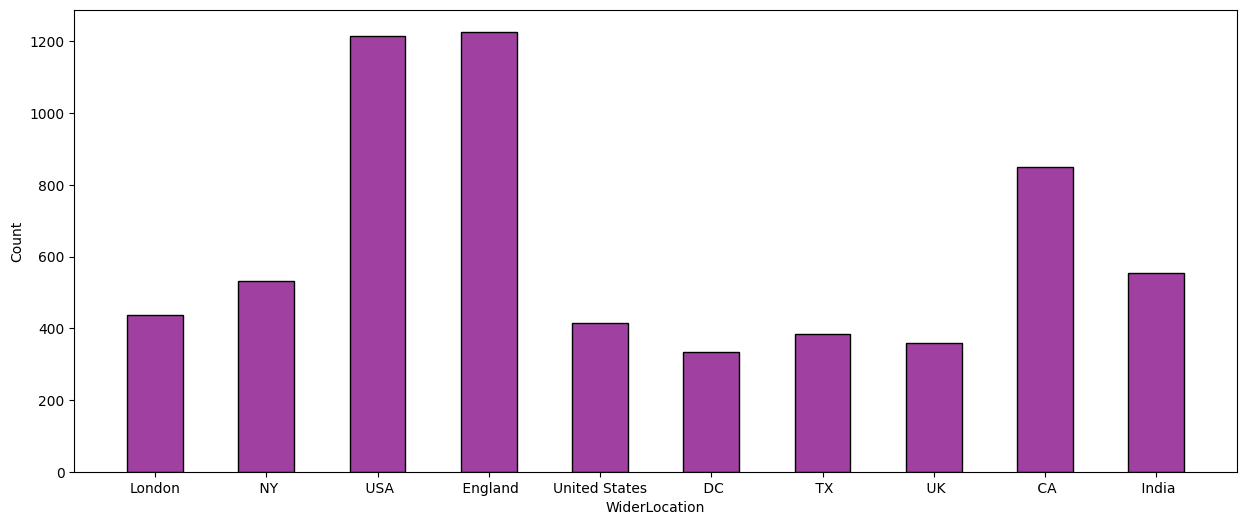

In [45]:
plt.figure(figsize=(15, 6))

sns.histplot(data=pd.DataFrame(df[df["WiderLocation"].isin(df["WiderLocation"].value_counts()[1:11].index)]),
             x="WiderLocation", color="purple", shrink=.5)

In [46]:
loc = (df["WiderLocation"].value_counts())[df["WiderLocation"].value_counts() > 1].index[1:]

ohe = OneHotEncoder(sparse=False)
res = ohe.fit_transform(df[["WiderLocation"]])

res = pd.DataFrame(res, columns=ohe.get_feature_names_out(["WiderLocation"]))[list(map((lambda x: "WiderLocation_" + x), loc.tolist()))]

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [47]:
X_train, X_test = train_test_split(df, train_size=0.7, random_state=0)

In [48]:
log_reg = LogisticRegression(max_iter=250)

res_train_new = hstack((res_train, ohe.transform(X_train[["WiderLocation"]])))
res_test_new = hstack((res_test, ohe.transform(X_test[["WiderLocation"]])))

log_reg.fit(res_train_new, X_train["Sentiment"])

print("Accuraccy на CountVectorizer (train): ", round(accuracy_score(X_train["Sentiment"], log_reg.predict(res_train_new)),3))
print("Accuraccy на CountVectorizer (test): ", round(accuracy_score(X_test["Sentiment"], log_reg.predict(res_test_new)), 3))

#Я безумно ненавижу 7 задание. А вообще, даже по логике место не сильно влияет на результат.
#Все таки ситуация в западных странах была примерно одинаковой

Accuraccy на CountVectorizer (train):  0.949
Accuraccy на CountVectorizer (test):  0.846


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Ex. 8 Bonus

In [49]:
X_train, X_test = train_test_split(df, train_size=0.7, random_state=0, stratify=df["Sentiment"])

In [50]:
def custom_bonus_tokenizer(text):
  ##to_lower()
  text = text.lower()

  stemmer = SnowballStemmer(language="english")

  #tokenization
  tk = TweetTokenizer()
  tokens = tk.tokenize(text)

  #changing
  tokens = [stemmer.stem(i) for i in tokens if not(len(i) == 1 and ord(i) >= 128 or
                                     i in punctuation or i == "…" or
                                     i[:13] == "https://t.co/" or
                                     i in stopwords.words('english'))]

  return tokens

In [51]:
reg_bonus = LogisticRegression(max_iter=500)
tfid_bonus = CountVectorizer(tokenizer=custom_bonus_tokenizer, min_df=3, max_df=4500)
# sc_bonus = StandardScaler(with_mean=False)

In [52]:
tfid_bonus.fit(X_train["OriginalTweet"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CountVectorizer(max_df=4500, min_df=3,
                tokenizer=<function custom_bonus_tokenizer at 0x7bf6ccb47130>)

In [53]:
bonus_train = tfid_bonus.transform(X_train["OriginalTweet"])
bonus_test = tfid_bonus.transform(X_test["OriginalTweet"])

In [54]:
# sc_bonus.fit(bonus_train)
# bonus_train = sc_bonus.transform(bonus_train)
# bonus_test = sc_bonus.transform(bonus_test)

reg_bonus.fit(bonus_train, X_train["Sentiment"])

LogisticRegression(max_iter=500)

In [55]:
print("Accuraccy на CountVectorizer (train): ", round(accuracy_score(X_train["Sentiment"], reg_bonus.predict(bonus_train)),3))
print("Accuraccy на CountVectorizer (test): ", round(accuracy_score(X_test["Sentiment"], reg_bonus.predict(bonus_test)), 3))

Accuraccy на CountVectorizer (train):  0.952
Accuraccy на CountVectorizer (test):  0.869
